In [16]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [18]:
xtrain=xtrain.reshape((xtrain.shape[0],28,28,1))
xtest=xtest.reshape((xtest.shape[0],28,28,1))

In [19]:
train_norm = xtrain.astype('float32')
test_norm = xtest.astype('float32')
xtrain = train_norm/255.0
xtest = test_norm/255.0

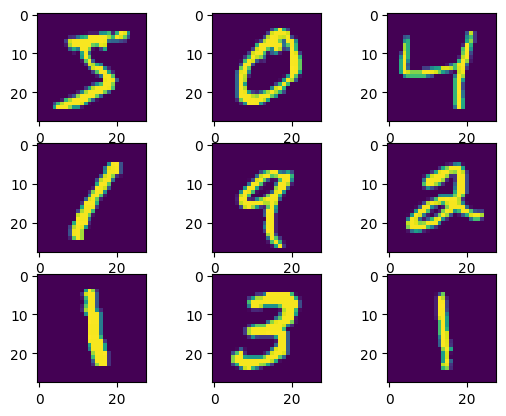

In [20]:
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(xtrain[i])

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [22]:

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
history=model.fit(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2218 - accuracy: 0.9356 - val_loss: 0.1756 - val_accuracy: 0.9469
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1686 - accuracy: 0.9504 - val_loss: 0.1435 - val_accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1374 - accuracy: 0.9588 - val_loss: 0.1143 - val_accuracy: 0.9656
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1167 - accuracy: 0.9651 - val_loss: 0.1085 - val_accuracy: 0.9670
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1015 - accuracy: 0.9689 - val_loss: 0.1029 - val_accuracy: 0.9670


In [32]:
predictions =model.predict(xtest)

313/313 [==============================] - 2s 5ms/step


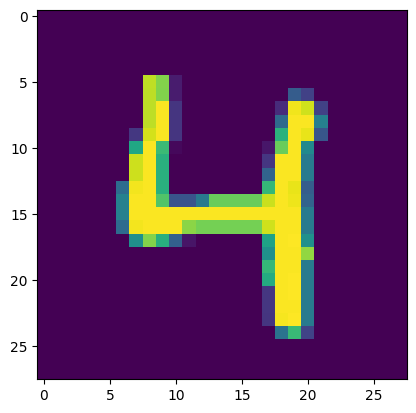

In [33]:
import random
index = random.randint(1,10000)
plt.imshow(xtest[index])

In [34]:
pred_num = max(predictions[index])
for i in range(len(predictions[index])):
    if(predictions[index][i] == pred_num):
        print("Predicted number is: ",i)
        break

Predicted number is:  4


In [35]:
print(model.evaluate(xtest,ytest))

313/313 [==============================] - 2s 6ms/step - loss: 0.1029 - accuracy: 0.9670
[0.10292910039424896, 0.9670000076293945]


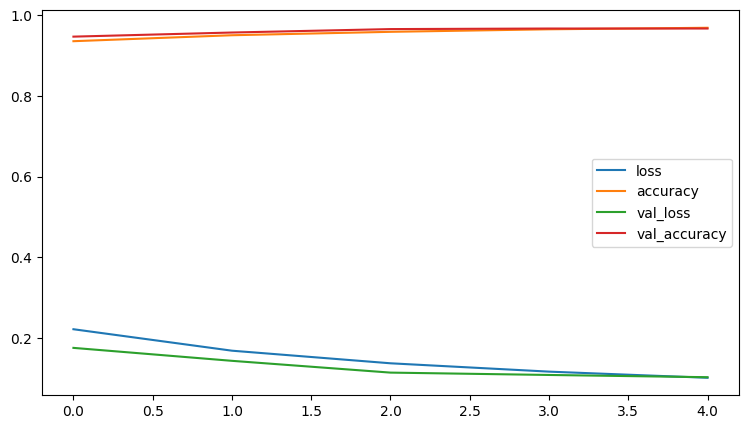

In [36]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(9,5))
plt.show()

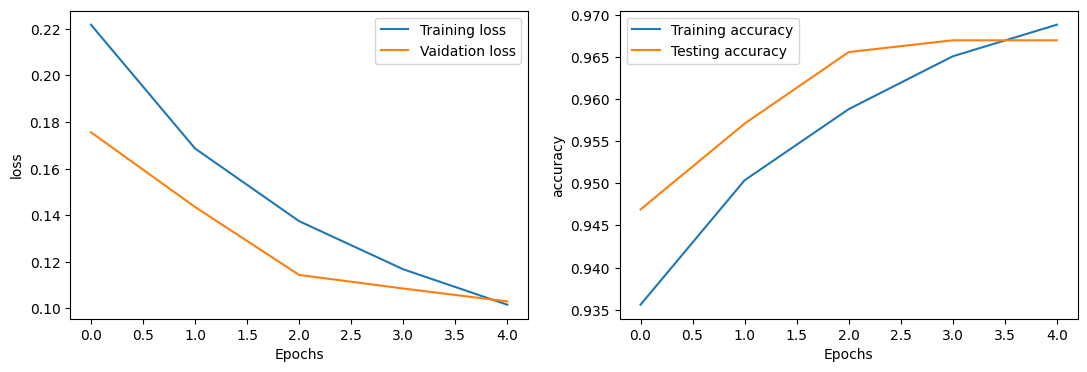

In [37]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Vaidation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
